In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import trapz

In [2]:
def nu1(t: float, tau: float):
    return 0.008 * np.ones(tau.shape)
def nu2(t: float, tau: float):
    return 0.00425 + -0.00085 * tau 
def m(t: float, tau: np.ndarray, dFdtau: np.ndarray):
    mm = np.zeros(tau.shape)
    for i, ttau in enumerate(tau):
        tt = np.linspace(0,ttau,100)
        int1 = trapz(nu1(t,tt), tt)
        int2 = trapz(nu2(t,tt), tt)
        
        mm[i] = nu1(t,ttau) * int1 + nu2(t,ttau) * int2 #+ dFdtau[i]
    return mm
def get_dFdtau(F,tau):
    dFdtau = np.diff(F,append=[F[-1]])/np.diff(tau,append=[0])
    dFdtau[-1] = dFdtau[-2]
    return dFdtau 

In [3]:
tau = np.array([0,1,3,5,10,30])
F = np.array([0.0695,0.075,0.078,0.0797,0.082,0.086])
dFdtau = np.diff(F,append=[F[-1]])/np.diff(tau,append=[0])
vol1 = nu1(0,tau)
vol2 = nu2(0,tau)
mm = m(0,tau,dFdtau)

/var/folders/3z/4nv7cgnx71s2x31qgf7whd5h0000gn/T/ipykernel_3696/1382369417.py:9: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  int1 = trapz(nu1(t,tt), tt)
/var/folders/3z/4nv7cgnx71s2x31qgf7whd5h0000gn/T/ipykernel_3696/1382369417.py:10: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  int2 = trapz(nu2(t,tt), tt)


In [4]:
print(vol1)
print(vol2)
print(dFdtau)
print(mm)

[0.008 0.008 0.008 0.008 0.008 0.008]
[ 4.25000000e-03  3.40000000e-03  1.70000000e-03  8.67361738e-19
 -4.25000000e-03 -2.12500000e-02]
[ 0.0055   0.0015   0.00085  0.00046  0.0002  -0.     ]
[0.000000e+00 7.700500e-05 2.071725e-04 3.200000e-04 6.400000e-04
 7.338750e-03]


In [5]:
def HJM_evolve(F, t, tau, dt: float):
    vol1 = nu1(0,tau)
    vol2 = nu2(0,tau)
    mm = m(0,tau,np.zeros(F.shape))
    
    dX = np.random.normal(0, np.sqrt(dt))
    
    return F + mm * dt + (vol1+vol2) * dX 

In [6]:
FF = np.zeros([len(F),100])
FF[:,0] = F 
dt = 0.05 
t  = 0 
for i in range(1,100):
    FF[:,i] = HJM_evolve(FF[:,i-1], t, tau, dt)
    t+= dt
    

/var/folders/3z/4nv7cgnx71s2x31qgf7whd5h0000gn/T/ipykernel_3696/1382369417.py:9: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  int1 = trapz(nu1(t,tt), tt)
/var/folders/3z/4nv7cgnx71s2x31qgf7whd5h0000gn/T/ipykernel_3696/1382369417.py:10: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  int2 = trapz(nu2(t,tt), tt)


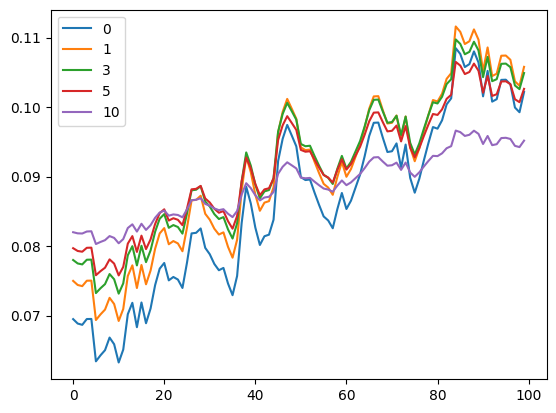

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(tau[:-1])):
    ax.plot(FF[i,:], label=f"{tau[i]}")
    
ax.legend()